## Setup

In [1]:
import warnings
warnings.filterwarnings("ignore")

from __future__ import division

import numpy as np
import os
from glob import glob

from PIL import Image
from copy import deepcopy

from IPython.display import clear_output

from sklearn import linear_model, datasets, neighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set_context('poster')
colors = sns.color_palette("cubehelix", 5)
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

import pandas as pd

import scipy.stats as stats
from scipy.stats import norm
import sklearn
import itertools

import sys
if sys.version_info[0] >= 3:
    from importlib import reload

### define paths to data

In [2]:
curr_dir = os.getcwd()

In [3]:
# definte ROIs
roi_list_connect = np.array(['V1Draw', 'V2Draw', 'LOCDraw', 'ParietalDraw', 'preCentralDraw'])

In [4]:
## root paths
proj_dir = os.path.abspath(os.path.join(curr_dir,'..','..')) ## use relative paths
data_dir = os.path.abspath(os.path.join(curr_dir,'..','..','data')) ## use relative paths 'D:\\data'
path_to_connect = os.path.join(data_dir, 'features/connectivity')
csv_dir = os.path.join(proj_dir, 'results','csv')
nb_name = '3_connectivity_pattern_during_drawing'

## add helpers to python path
import sys
if os.path.join(proj_dir, 'analysis','utils') not in sys.path:
    sys.path.append(os.path.join(proj_dir, 'analysis','utils'))

## module definitions
import object_evidence_analysis_helpers as utils
reload(utils)
utils.data_dir = data_dir
utils.path_to_connect = path_to_connect
utils.roi_list_connect = roi_list_connect

/Users/jeffwammes/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### get file list

In [5]:
## get raw file list for connectivity features
CONNECT_METAS = sorted([i for i in os.listdir(path_to_connect) if (i.split('.')[-1]=='csv')])
CONNECT_FEATS = sorted([i for i in os.listdir(path_to_connect) if (i.split('.')[-1]=='npy')])
CONNECT_SUBS = np.array([i.split('_')[0] for i in CONNECT_FEATS])

sub_list = np.unique(CONNECT_SUBS)

In [6]:
print('We have data from {} subjects.'.format(len(sub_list)))

We have data from 31 subjects.


### DRAWING: How well do we do at classifying the target during production runs based on the connectivity patterns across trials?

In [35]:
reload(utils)
version = 'phase'  # 'phase', 'allruns'
logged = True
feattype = 'stack'

really_run = 0
if really_run:

    ALLDM, Acc = utils.make_drawing_connectivity_predictions(sub_list[:], roi_list_connect,
                                                             version=version, feature_type=feattype,
                                                             logged=logged)
    ## save out ALLDM & Acc
    Acc = np.array(Acc)
    np.save(os.path.join(csv_dir,
                         '{}_{}_accuracy_production.npy'.format(feattype, version)),Acc)
    ALLDM.to_csv(os.path.join(csv_dir,
                              '{}_{}_logprobs_production.csv'.format(feattype, version)),index=False)
    
else:
    ## load in existing ALLDM & Acc 
    Acc = np.load(os.path.join(csv_dir,
                               '{}_{}_accuracy_production.npy'.format(feattype, version)))
    ALLDM = pd.read_csv(os.path.join(csv_dir,
                                     '{}_{}_logprobs_production.csv'.format(feattype, version)))
    
ALLDM['phase_num'] = np.where(ALLDM['run_num']>2, 2, 1)
trials = np.tile(np.arange(40), int(ALLDM.shape[0]/40))
ALLDM['trial_num'] = trials

ALLDM.to_csv(os.path.join(csv_dir,
                          '{}_{}_logprobs_production.csv'.format(feattype, version)),index=False)
print('Done!')

Done!


### make summary timecourse plots

Now plotting results for V1Draw and V2Draw ...
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,)

/Users/jeffwammes/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


 (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
Now plotting results for V1Draw and LOCDraw ...
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
Now plotting results for V1Draw and ParietalDraw ...
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,

KeyboardInterrupt: 

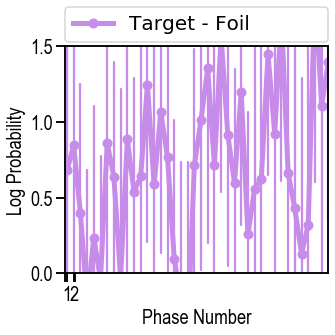

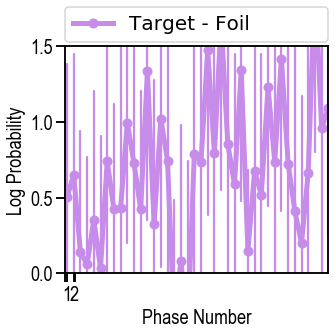

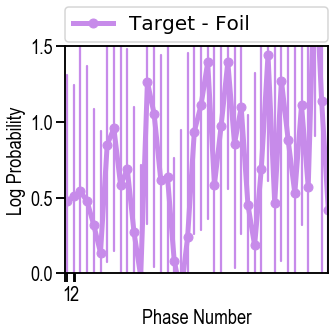

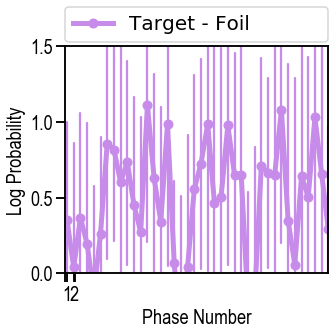

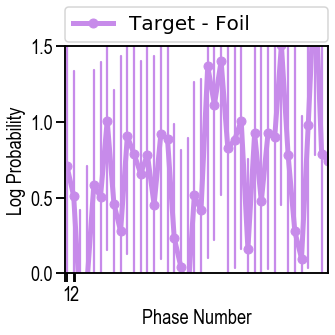

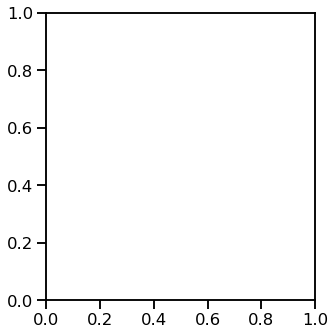

In [57]:
reload(utils)
version = 'phase'
tags = ['logged']
iv_list = ['trials', 'phase_num']
plotType='line'
feattype = 'connect'

reallyRun = 1
if reallyRun:
    for tag in tags:
        for iv in iv_list:
            ALLDM = pd.read_csv(os.path.join(csv_dir, 
                                             '{}_{}_logprobs_production.csv'.format(feattype, version)))
            try:
                utils.plot_connect_timecourse(ALLDM,
                                              this_iv=iv,
                                              roi_list=roi_list_connect,
                                              render_cond=0,
                                              version = version,
                                              proj_dir=proj_dir,
                                              plotType=plotType)
            except KeyError:
                pass

### Add phase column to ROI pair data

In [59]:
all_pairs = list(itertools.combinations(roi_list_connect, 2))
for (this_roi, that_roi) in all_pairs:
    x = pd.read_csv('{}/{}_{}_{}_trials.csv'.format(csv_dir, feattype, this_roi, that_roi))
    x['phase'] = np.where(x['trials']>19, 2, 1)
    x.to_csv('{}/{}_{}_{}_trials.csv'.format(csv_dir, feattype, this_roi, that_roi))

### Analyze output with lmer in R

In [54]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [55]:
%%R -i version,csv_dir,feattype
library(lme4)
setwd(csv_dir)

In [61]:
%%R -i version,csv_dir,feattype

ROIS <- c("V1Draw", "V2Draw", "LOCDraw", "parietalDraw", "preCentralDraw")
CROSS <- combn(ROIS, 2)

for(i in 1:10) {
  fname <- sprintf("%s/%s_%s_%s_trials.csv", csv_dir, feattype, CROSS[1, i], CROSS[2, i])
  print(fname)
  DAT <- read.csv(fname, header = TRUE)
  TmF <- subset(DAT,condition=='Target - Foil')
  RunWise <- lmer(probability ~ phase + (1|sub), data=TmF)
  NullMod <- lmer(probability ~ (1|sub), data=TmF)
  ConfInt <- confint(RunWise, method="boot", oldName=FALSE)
  print(CROSS[, i])
  print(summary(RunWise))
  print(anova(RunWise, NullMod))
  LL<-(anova(RunWise, NullMod))$logLik
  DF<-(anova(RunWise, NullMod))$Df
  ANOVA<-data.frame(DF, LL)
  ANOVA$AIC <- (2*ANOVA$DF)+(-2*ANOVA$LL)
  ANOVA$deltaAIC <- ANOVA$AIC - (min(ANOVA$AIC))
  ANOVA$AIC2 <- exp(-0.5*ANOVA$deltaAIC)
  ANOVA$wAIC <- ANOVA$AIC2/(sum(ANOVA$AIC2))
  print(ANOVA)
  print(ConfInt)
  max(ANOVA$wAIC)
}


/Users/jeffwammes/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
4 warning(s): Model failed to converge with max|grad| = 0.00288164 (tol = 0.002, component 1) (and others)


  warnings.warn(x, RRuntimeWarning)
/Users/jeffwammes/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
1 warning(s): Model failed to converge with max|grad| = 0.00294242 (tol = 0.002, component 1)


  warnings.warn(x, RRuntimeWarning)
/Users/jeffwammes/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
1 warning(s): Model failed to converge with max|grad| = 0.00283335 (tol = 0.002, component 1)


  warnings.warn(x, RRuntimeWarning)
/Users/jeffwammes/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
4 warning(s): Model failed to converge with max|grad| = 0.00230626 (tol = 0.002, component 1) (and others)


  warnings.warn(x, RRuntimeWarning)
/Users/jeffwammes/

[1] "/Volumes/ntb/projects/neurosketch/results/csv/connect_V1Draw_V2Draw_trials.csv"
[1] "V1Draw" "V2Draw"
Linear mixed model fit by REML ['lmerMod']
Formula: probability ~ phase + (1 | sub)
   Data: TmF

REML criterion at convergence: 6084.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8939 -0.5626 -0.0176  0.5752  3.4331 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub      (Intercept) 0.6553   0.8095  
 Residual             7.6151   2.7596  
Number of obs: 1240, groups:  sub, 31

Fixed effects:
             Estimate Std. Error t value
(Intercept) -0.006171   0.287319  -0.021
phase        0.472933   0.156732   3.017

Correlation of Fixed Effects:
      (Intr)
phase -0.818
Data: TmF
Models:
NullMod: probability ~ (1 | sub)
RunWise: probability ~ phase + (1 | sub)
        Df    AIC  BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)   
NullMod  3 6095.6 6111 -3044.8   6089.6                            
RunWise  4 6088.5 6109 -3040.3   6080.5 9.0784      1   